In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

In [14]:
df_train = pd.read_csv('datasets/train_polished.csv')
df_test = pd.read_csv('datasets/test_polished.csv')

In [15]:
X_train = df_train[['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual', 'Bsmt Qual',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
         'Garage Cars', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'total bath',
       'total sf', 'age', 'Neighborhood Interaction']]
y_train = df_train['SalePrice'] ## Sale price
####instatiatie model
Y_train = np.log(y_train)
model = LinearRegression()
###fit model to train data
model.fit(X_train, Y_train)
# check the score on the training data
model.score(X_train, Y_train)

0.8668134826317817

In [16]:
X_test = df_test[['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual', 'Bsmt Qual',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
         'Garage Cars', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'total bath',
       'total sf', 'age','Neighborhood Interaction']]  
y_hat = np.exp(model.predict(X_test))

In [17]:
newest_model = pd.DataFrame({'Id': df_test['Id'],
                                     'SalePrice': y_hat,})
newest_model.head()

,Id,SalePrice
0,2658,118164.438581
1,2718,160234.608605
2,2414,217947.219392
3,1989,106309.161059
4,625,171823.746191


In [18]:
newest_model.to_csv('newest_model.csv', index=False)

In [19]:
df_train['Quality Interaction'] = df_train['Neighborhood Interaction'] * df_train['Overall Qual']

In [20]:
df_test['Quality Interaction'] = df_test['Neighborhood Interaction'] * df_test['Overall Qual']

In [21]:
X_train = df_train[['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual', 'Bsmt Qual',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
         'Garage Cars', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'total bath',
       'total sf', 'age', 'Neighborhood Interaction', 'Quality Interaction']]
y_train = df_train['SalePrice'] ## Sale price
####instatiatie model
Y_train = np.log(y_train)
model = LinearRegression()
###fit model to train data
model.fit(X_train, Y_train)
# check the score on the training data
model.score(X_train, Y_train)

0.8675240010658936

In [22]:
X_test = df_test[['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual', 'Bsmt Qual',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
         'Garage Cars', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'total bath',
       'total sf', 'age','Neighborhood Interaction', 'Quality Interaction']]  
y_hat = np.exp(model.predict(X_test))

In [23]:
extreme_model = pd.DataFrame({'Id': df_test['Id'],
                                     'SalePrice': y_hat,})
extreme_model.head()

,Id,SalePrice
0,2658,118128.765453
1,2718,157625.584989
2,2414,218017.048923
3,1989,106965.058363
4,625,171196.446532


In [24]:
extreme_model.to_csv('extreme_model.csv', index=False)

In [25]:
df_train['Total Interaction'] = df_train['total sf'] * df_train['Overall Qual']

In [26]:
df_test['Total Interaction'] = df_test['total sf'] * df_test['Overall Qual']

In [27]:
df_train.columns

Index(['Id', 'Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 'Exterior 1st', 'Exterior 2nd',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Paved Drive', 'Mo Sold',
       'Yr Sold', 'SalePrice', 'total bath', 'total sf', 'age',
       'Neighborhood Interaction', 'overall SF Interaction',
       'Quality Interaction', 'Total Interaction'],
      dtype='object')

In [28]:
X_train = df_train[['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual',  'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'total bath',
       'total sf', 'age', 'Neighborhood Interaction', 'Quality Interaction',
       'Total Interaction']]
y_train = df_train['SalePrice'] ## Sale price
####instatiatie model
Y_train = np.log(y_train)
model = LinearRegression()
###fit model to train data
model.fit(X_train, Y_train)
# check the score on the training data
model.score(X_train, Y_train)

0.8802992604538432

In [29]:
X_test = df_test[['Lot Frontage', 'Lot Area', 'Neighborhood', 'Overall Qual',
       'Year Built', 'Year Remod/Add', 
       'Exter Qual', 'Bsmt Qual', 'Bsmt Cond', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Gr Liv Area', 'Kitchen Qual',
       'TotRms AbvGrd', 'Fireplaces', 
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Paved Drive', 'Mo Sold', 'Yr Sold', 'total bath',
       'total sf', 'age', 'Neighborhood Interaction', 'Quality Interaction',
       'Total Interaction']]  
y_hat = np.exp(model.predict(X_test))

In [30]:
rockin_model = pd.DataFrame({'Id': df_test['Id'],
                                     'SalePrice': y_hat,})
rockin_model.head()

,Id,SalePrice
0,2658,124760.438896
1,2718,176044.458062
2,2414,217960.702007
3,1989,110547.285173
4,625,172808.813232


In [31]:
rockin_model.to_csv('rockin_model.csv', index=False)

In [32]:
print(len(y_hat))

878


In [34]:
rockin_model['actual'] = y_train

In [35]:
rockin_model

,Id,SalePrice,actual
0,2658,124760.438896,130500
1,2718,176044.458062,220000
2,2414,217960.702007,109000
3,1989,110547.285173,174000
4,625,172808.813232,138500
...,...,...,...
873,1662,185257.838662,75200
874,1234,208190.189589,131250
875,1373,130441.273406,148000
876,1672,105423.934666,124100


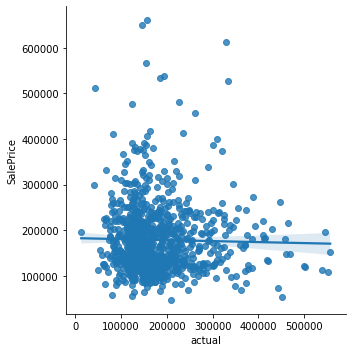

In [36]:
sns.lmplot(x="actual", y="SalePrice", data=rockin_model);

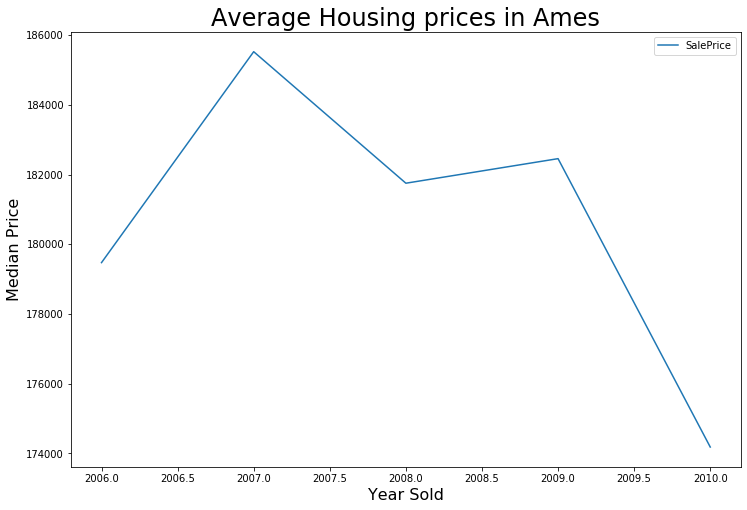

In [37]:
df_train[['Yr Sold','SalePrice']].groupby(['Yr Sold'], as_index=True).mean().plot(figsize=(12,8))
plt.title('Average Housing prices in Ames', fontsize=24);
plt.ylabel('Median Price', fontsize=16);
plt.xlabel('Year Sold', fontsize=16);
plt.savefig('mean_price.png')